In [1]:
import os
script_name = 'test_trans_model.ipynb'
dir_path = os.path.dirname(os.path.realpath(script_name))
parent_path = os.path.dirname(dir_path)
Func_path = os.path.join(parent_path,'Func')

import sys
sys.path.append(Func_path)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from loading_data import DataLoader_base
from building_network import NetworkBuild_base
from run_network import NetworkRun_base
from editing_network import NetworkEdit_base

Using TensorFlow backend.


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
dataset = DataLoader_base(data_source="inside",filename="mnist")

In [5]:
print(dataset.info)

{'num_test': 10000, 'num_train': 60000, 'validation_status': True, 'input_shape': (28, 28, 1), 'dataset_name': 'mnist', 'output_shape': ()}


In [6]:
network = NetworkBuild_base(task="classification", input_shape=[28,28,1], 
                            output_shape = 10, pre_train=False, net_name="VGG19", customized_model=None)

In [7]:
print(network.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
__________

In [8]:
import keras
dataset.output_train = keras.utils.to_categorical(dataset.output_train, network.output_shape)
dataset.output_test = keras.utils.to_categorical(dataset.output_test, network.output_shape)
dataset.input_train = dataset.input_train.astype('float32')
dataset.input_test = dataset.input_test.astype('float32')
dataset.input_train /= 255
dataset.input_test /= 255
# dataset.input_train = np.reshape(dataset.input_train,(-1,28,28,1))
print(dataset.input_train.shape)

(60000, 28, 28, 1)


In [21]:
train_model = NetworkRun_base(model=network.model, opt = keras.optimizers.Adadelta(), 
                              loss = keras.losses.categorical_crossentropy,
                              input_train=dataset.input_train, output_train=dataset.output_train, 
                              batch_size=256,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 58us/step - loss: 14.1885
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 14.1877
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 14.1893
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 14.1743
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 14.1713
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 14.1772
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 14.1737
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 14.1799
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 14.1917
Epoch 10/10
60000/60000 [==============================] - 3s 50us/step - loss: 14.1987


In [22]:
scores = train_model.model.evaluate(dataset.input_test, dataset.output_test, verbose=1)
print(scores)

10000/10000 [==============================] - 1s 71us/step
14.4901675278


In [23]:
predict = train_model.model.predict(dataset.input_train[:1])

In [24]:
print(predict)

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


In [25]:
print(dataset.output_train[:1])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


(60000, 28, 28, 1)


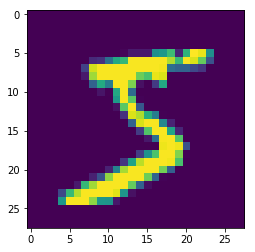

In [29]:
print(dataset.input_train.shape)
plt.imshow(dataset.input_train[0,:,:,0])

In [30]:
my_model = NetworkEdit_base(model=train_model.model)

In [31]:
my_model.TransModel()

In [32]:
print(my_model.trans_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ad_layer_1 (AdLayer)         (None, 28, 28, 1)         784       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
__________

In [33]:
aaa = my_model.trans_model.layers[0].get_weights()

In [35]:
print(len(aaa),aaa[0].shape)

1 (28, 28, 1)


In [37]:
my_weights = dataset.input_train[0]
print(my_weights.shape)

(28, 28, 1)


In [39]:
my_model.trans_model.layers[0].set_weights([my_weights])
for i in range(1,len(my_model.trans_model.layers)):
    my_model.trans_model.layers[i].trainable=False

In [53]:
opt = keras.optimizers.SGD(lr=1) 
loss = keras.losses.mean_squared_error
my_model.trans_model.compile(optimizer=opt,loss=loss)

In [54]:
print(my_model.trans_model.input_shape)

(None, 28, 28, 1)


In [55]:
import numpy as np

In [56]:
my_model.trans_model.fit(x=np.ones((1,28,28,1)),y=dataset.output_train[:1],batch_size=1,epochs=1000,verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 374ms/step - loss: 0.2000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 13/1000
1/1 [============================

Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 105/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 106/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 107/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 109/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 110/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 111/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 112/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 113/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 114/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 115/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 116/1000
1/1 [========

Epoch 206/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 208/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 209/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 210/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 211/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 212/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 213/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 214/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 215/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 216/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 217/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 218/1000
1/1 [========

1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 308/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 316/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 317/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 318/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 319/1000
1/1 [=======================

Epoch 409/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 410/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 411/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 412/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 414/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 416/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 417/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 418/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 419/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 420/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 421/1000
1/1 [========

1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 511/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 512/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 513/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 514/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 516/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 517/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 518/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 519/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 520/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 521/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 522/1000
1/1 [=======================

Epoch 612/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 613/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 615/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 616/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 624/1000
1/1 [========

1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 714/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 716/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 718/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 720/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 721/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 722/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 723/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2000
Epoch 724/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 725/1000
1/1 [=======================

Epoch 815/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 816/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 817/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 818/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 819/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 820/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 821/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 822/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 823/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 824/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 825/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 826/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 827/1000
1/1 [========

1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 917/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 918/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 919/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 920/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 921/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 922/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 923/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000
Epoch 928/1000
1/1 [=======================

1 (28, 28, 1)


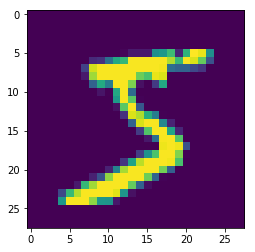

In [47]:
aaa = my_model.trans_model.layers[0].get_weights()
print(len(aaa),aaa[0].shape)
plt.imshow(aaa[0][:,:,0])